## **Оглавление**

### **[Введение](#1)**
### **1. [Обзор данных](#2)**  
### **2. [Предобработка данных](#3)**  
    2.1 Изменение названия столбца
    2.2 Обработка пропусков
    2.3 Изменение типа данных  
    2.4 Поиск некорректных значений
    2.5 Обработка дубликатов
    2.6 Добавление результатов в таблицу
### 3. [Исследовательски анализ данных](#4)
    3.1 Изучение параметров: площадь, цена, кол-во комнат, высота потолков для всех населенных пунктов
    3.2 Факторы, влияющие на цену квартиры
    3.3 Изучение стоимости квадратного метра в населенных пунктах
    3.4 Анализ квартир в центре
### **[Итоги исследования](#5)**

# Исследование объявлений о продаже квартир

## Введение  <a id='1'></a>

У нас есть архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.  

Цель исследования: научиться определять рыночную стоимость объектов недвижимости.  

Задача: установить параметры, которые позволят построить автоматизированную систему, она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.  

Исследование проводится в три этапа:

1. Обзор данных  
2. Предобработка данных  
3. Исследовательский анализ данных  

## Обзор данных  <a id='2'></a>

Ознакомимся с входными данными.

In [155]:
#импортируем библиотеки
import pandas as pd

import matplotlib.pyplot as plt

In [156]:
pd.set_option('display.max_columns', None) #настроим опцию, чтобы выводить все столбцы

In [157]:
import warnings

warnings.filterwarnings('ignore') #игнорируем предупреждения

In [158]:
data = pd.read_csv('/datasets/real_estate_data.csv')
#прочитаем файл с данными и сохраним его в переменной data

data.head() #выведем на экран первые 5 строк таблицы

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


Все данные в таблице "склеины", нужно разделить на столбцы.

In [159]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t') #делим данные на отдельные столбцы

data.head() #выведем на экран первые 5 строк таблицы


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [160]:
data.info() #получим общую информацию о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Согласно документации к данным:  

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)  
balcony — число балконов  
ceiling_height — высота потолков (м)  
cityCenters_nearest — расстояние до центра города (м)  
days_exposition — сколько дней было размещено объявление (от публикации до снятия)  
first_day_exposition — дата публикации  
floor — этаж  
floors_total — всего этажей в доме  
is_apartment — апартаменты (булев тип)  
kitchen_area — площадь кухни в квадратных метрах (м²)  
last_price — цена на момент снятия с публикации  
living_area — жилая площадь в квадратных метрах (м²)  
locality_name — название населённого пункта  
open_plan — свободная планировка (булев тип)  
parks_around3000 — число парков в радиусе 3 км  
parks_nearest — расстояние до ближайшего парка (м)  
ponds_around3000 — число водоёмов в радиусе 3 км  
ponds_nearest — расстояние до ближайшего водоёма (м)  
rooms — число комнат  
studio — квартира-студия (булев тип)  
total_area — площадь квартиры в квадратных метрах (м²)  
total_images — число фотографий квартиры в объявлении  

### Вывод

В таблице 22 столбца, названия написаны корректно, кроме столбца cityCenters_nearest, который нужно привести к единому стилю.  

Количество non-null значений в столбцах различается, следовательно есть пропуски значений. В столбцах parks_nearest и ponds_nearest пропущено больше половины значений. Так как мы не можем восстановить эти данные, столбцы можно удалить, это не помешает нашему исследованию.  

В колонках с числовыми данными лучше изменить тип данных с float64 на Int64 и округлить значения для удобства работы, столбец first_day_exposition нужно представить в формате даты, а is_apartment привести к булеву типу.  

## Предобработка данных  <a id='3'></a>

### Измение названия столбца

In [161]:
data = data.rename(columns={'cityCenters_nearest':'city_сenters_nearest'})
#меняем старое название на новое

In [162]:
data.columns #выводим все названия колонок

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_сenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Столбец city_сenters_nearest приведен к общему стилю.

### Обработка пропусков

In [163]:
data.isna().sum() # подсчитаем кол-во пропусков в каждом столбце

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_сenters_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [164]:
# найдем процентное соотношение пропусков 

data.isna().sum()*100/len(data)

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
city_сenters_nearest    23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

В основном пропуски встречаются в данных, которые получены автоматически на основе картографических данных. Пропуски в столбцах ceiling_height, living_area и kitchen_area могут быть случайными.

 #### Замена пропусков в столбцах balcony,  parks_around3000 и ponds_around3000
 
В столбце balcony, если значение отсутствует, то, скорее всего, балкона просто нет, заменим пропуски на 0.  

В столбцах parks_around3000 и ponds_around3000 можно предположить, что отсутствие значения - это отсутствие парка или водоема в радиусе 3 км, также заменим все пропуски на 0.  


In [166]:
data['balcony'] = data['balcony'].fillna(0) #заменим пропущенные значения в столбце balcony на 0

data['parks_around3000'] = data['parks_around3000'].fillna(0)
#заменим пропущенные значения в столбце parks_around3000 на 0

data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
#заменим пропущенные значения в столбце ponds_around3000 на 0

#### Замена пропусков в столбцах ceiling_height, living_area и kitchen_area  

Можно предположить, что высота потолков, жилая площадь и площадь кухни влияет на стоимость квартиры: чем выше высота потолков, тем квартира дороже, чем больше жилая площадь и площадь кухни, тем квартира дороже.  

Поэтому заменим значения в этих колонках на медианные значения.

Для этого поделим все цены на квартиры на 5 групп, для удобства работы с данными присвоим каждой группе название: "низкая", "ниже среднего", "средняя", "выше среднего", "высокая" цена, и добавим их в новый столбец.

In [167]:
bin_labels_5 = ["низкая", "ниже среднего", "средняя", "выше среднего", "высокая"]
#создадим список с названиями интервалов

data['last_price_group'] = pd.qcut(data['last_price'], q=[0, .2, .4, .6, .8, 1], labels=bin_labels_5)
#создадим новый столбец last_price_group: разделим все значения столбца total_incomelast_price на 5 интервалов
#определим диапазон используемых квантилей и присвоим группам названия

data.head() #выведем первые 5 строк таблицы

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,last_price_group
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,высокая
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,ниже среднего
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,средняя
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,высокая
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,высокая


In [168]:
data['ceiling_height'] = data['ceiling_height'].fillna(data.groupby('last_price_group')['ceiling_height'].transform('median'))
#заменим пропуски в столбце ceiling_height на медианное значение в разрезе групп по стоимости квартиры

data['kitchen_area'] = data['kitchen_area'].fillna(data.groupby('last_price_group')['kitchen_area'].transform('median'))
#заменим пропуски в столбце kitchen_area на медианное значение в разрезе групп по стоимости квартиры

data['living_area'] = data['living_area'].fillna(data.groupby('last_price_group')['living_area'].transform('median'))
#заменим пропуски в столбце living_area на медианное значение в разрезе групп по стоимости квартиры

#### Замена пропусков в столбце is_apartment  

Заменим пропуски на значения False, так как отсутствие значения говорит о том, что недвижимость не является апартаментами.

In [169]:
data['is_apartment'] = data['is_apartment'].fillna('False')
#заменим пропущенные значение в столбце is_apartment на False

#### Замена пропусков в столбце locality_name  

Так как мы не можем восстановить данные, заменим отстствующие значения на понятное 'unknow'.

In [170]:
data['locality_name'] = data['locality_name'].fillna('unknow') 
#заменим пропущенные значения в столбце locality_name на unknow

#### Удалим столбцы parks_nearest и ponds_nearest

In [171]:
data = data.drop(['parks_nearest', 'ponds_nearest'], axis = 1) #удаление столбцов

data.columns #выведем названия всех столбцов, чтобы проверить удаление

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_сenters_nearest',
       'parks_around3000', 'ponds_around3000', 'days_exposition',
       'last_price_group'],
      dtype='object')

#### Пропуски в столбцах floors_total, airports_nearest, city_сenters_nearest  

Оставим пропущенные значения в этих столбцах, так как нет достаточной информации, и на основе уже имеющихся данных мы не можем заполнить пропуски.

Выведем кол-во пропусков в каждом столбце и первые 5 строк таблицы после внесенных изменений, чтобы убедиться, что замены произошли.

In [172]:
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total              86
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        5542
city_сenters_nearest    5519
parks_around3000           0
ponds_around3000           0
days_exposition         3181
last_price_group           0
dtype: int64

In [173]:
data.head() #выведем первые 5 строк таблицы

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around3000,ponds_around3000,days_exposition,last_price_group
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,2.0,NaN,высокая
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.57,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,0.0,81.0,ниже среднего
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.60,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,2.0,558.0,средняя
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,3.00,14.0,52.0,9,False,False,False,14.0,0.0,Санкт-Петербург,28098.0,6800.0,2.0,3.0,424.0,высокая
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,1.0,121.0,высокая


###  Изменение типа данных  

Посмотрим, каким типам соответствуют данные в столбцах.

In [174]:
data.dtypes #выведем информацию по типам данных по каждому столбцу

total_images               int64
last_price               float64
total_area               float64
first_day_exposition      object
rooms                      int64
ceiling_height           float64
floors_total             float64
living_area              float64
floor                      int64
is_apartment              object
studio                      bool
open_plan                   bool
kitchen_area             float64
balcony                  float64
locality_name             object
airports_nearest         float64
city_сenters_nearest     float64
parks_around3000         float64
ponds_around3000         float64
days_exposition          float64
last_price_group        category
dtype: object

Тип данных в столбце first_day_exposition заменим на формат даты. 

В floors_total, balcony, days_exposition, parks_around3000 и ponds_around3000 заменим на Int64 и округлим значения.

Столбец is_apartment на булев тип.

In [175]:
data['days_exposition'] = data['days_exposition'].round() #округлим значения
columns = ['floors_total', 'balcony', 'days_exposition', 'parks_around3000','ponds_around3000']
for i in columns:
    data[i] = data[i].astype('Int64')
# создадим цикл для замены типа данных в нужных столбцах на Int64

In [176]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
# в столбце first_day_exposition заменим тип данных на формат даты

In [177]:
data['is_apartment'] = data['is_apartment'].astype('bool')
# в столбце is_apartment заменим тип данных на булев тип

Убедимся, что типы данных изменились.

In [178]:
data.dtypes #выведем информацию по типам данных по каждому столбцу

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     Int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          Int64
locality_name                   object
airports_nearest               float64
city_сenters_nearest           float64
parks_around3000                 Int64
ponds_around3000                 Int64
days_exposition                  Int64
last_price_group              category
dtype: object

In [179]:
data.head() #выведем первые 5 строк таблицы

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around3000,ponds_around3000,days_exposition,last_price_group
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,2,NaN,высокая
1,7,3350000.0,40.4,2018-12-04,1,2.57,11,18.6,1,True,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,0,81,ниже среднего
2,10,5196000.0,56.0,2015-08-20,2,2.60,5,34.3,4,True,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,2,558,средняя
3,0,64900000.0,159.0,2015-07-24,3,3.00,14,52.0,9,True,False,False,14.0,0,Санкт-Петербург,28098.0,6800.0,2,3,424,высокая
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,1,121,высокая


### Поиск некорректных значений  

Выведем уникальные значения столбцов и найдем некорректные значения.

In [180]:
unique_colomns = data[['total_images'
                 ,'floor'
                 , 'floors_total'
                 , 'rooms'
                 , 'balcony'
                 , 'parks_around3000'
                 , 'ponds_around3000'
                 , 'ceiling_height']]
#сохраним в переменную нужные нам столбцы

for col in unique_colomns: #создаем цикл, который выведет уникальные значения по всем выбранным столбцам
    print(col, ': ', data[col].unique())
    print()

total_images :  [20  7 10  0  2  6  5 18  9  1 16 11  8 12 13  3 15 17 14 19 32  4 35 39
 23 21 27 30 24 25 28 31 22 29 26 50 42 37]

floor :  [ 8  1  4  9 13  5  6 22 26  7  3  2 11 15 18 10 19 16 20 27 25 17 14 12
 21 28 24 23 30 29 32 33 31]

floors_total :  <IntegerArray>
[ 16,  11,   5,  14,  12,  26,  24,  27,   9,   6,  17,  25,   3,  23,  19,
  18,   4,  22,   8,   2,  10,   7,  13,  15, NaN,  20,  28,  36,  21,  35,
  34,  60,   1,  29,  33,  52,  37]
Length: 37, dtype: Int64

rooms :  [ 3  1  2  4  5  6  0  7 11  8 14 10 15  9 19 16 12]

balcony :  <IntegerArray>
[0, 2, 1, 5, 4, 3]
Length: 6, dtype: Int64

parks_around3000 :  <IntegerArray>
[1, 0, 2, 3]
Length: 4, dtype: Int64

ponds_around3000 :  <IntegerArray>
[2, 0, 3, 1]
Length: 4, dtype: Int64

ceiling_height :  [  2.7    2.57   2.6    3.     3.03   2.55   2.5    2.67   2.56   3.05
   2.75   2.9    2.8    2.65   3.2    2.61   3.25   3.45   2.77   2.85
   2.64   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84   3.1


Значения в столбце rooms более 10 сомнительные, но, возможно, это коммуналки. Не будем изменять значения. 0 комнат говорит о том, что квартира является студией.

В столбце floors_total есть два неправдоподобных значения: 52 и 60. Согласно данным из интернета, самый высокий жилой дом в Санкт-Петербурге в 37 этажей, следовательно 52 и 60 - это некорректные значения. Заменим их на 5 и 6 соответственно.

In [181]:
data['floors_total'] = data['floors_total'].replace(52,5)
#в столбце floors_total меняем значение 52 на 5

data['floors_total'] = data['floors_total'].replace(60,6)
#в столбце floors_total меняем значение 60 на 6

Для удобства прочтения данных отсортируем уникальные значения столбца ceiling_height по возрастанию.

In [182]:
sorted(data['ceiling_height'].unique())

[1.0,
 1.2,
 1.75,
 2.0,
 2.2,
 2.25,
 2.3,
 2.34,
 2.4,
 2.45,
 2.46,
 2.47,
 2.48,
 2.49,
 2.5,
 2.51,
 2.52,
 2.53,
 2.54,
 2.55,
 2.56,
 2.57,
 2.58,
 2.59,
 2.6,
 2.61,
 2.62,
 2.63,
 2.64,
 2.65,
 2.66,
 2.67,
 2.68,
 2.69,
 2.7,
 2.71,
 2.72,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 2.99,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.29,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.43,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.51,
 3.52,
 3.53,
 3.54,
 3.55,
 3.56,
 3.57,
 3.58,
 3.59,
 3.6,
 3.62,
 3.63,
 3.65,
 3.66,
 3.67,
 3.68,
 3.69,
 3.7,
 3.75,
 3.76,
 3.78,
 3.8,
 3.82,
 3.83,
 3.84,
 3.85,
 3.86,
 3.87,
 3.88,
 3.9,
 3.93,
 3.95,
 3.98,

Можно предположить, что существуют многоуровневые квартиры с высотой потолков до 20 м, но все что больше, скорее всего, некорректные данные. Заменим их на значения деленные на 10. Также не существуют квартиры с высотой потолков менее 2 метров, заменим все значения меньше 2 метров на 2.0.  

Сначала посчитаем кол-во некорректных значений в столбце ceiling_height, чтобы посмотреть как много данных мы хотим изменить.

In [183]:
data.loc[data.loc[:, 'ceiling_height'] >= 20.0]['ceiling_height'].count()
#кол-во квартир с высотой потолков больше 20 метров

23

In [184]:
data.loc[data.loc[:, 'ceiling_height'] < 2.0]['ceiling_height'].count() 
#кол-во квартир с высотой потолков менее 2 метров

3

Таких данных совсем немного, можно заменить, это не повлияет на результаты исследования.

In [185]:
wrong_values_ceiling_height = [1.0, 1.2, 1.75, 20.0, 22.6, 24.0, 25.0, 26.0, 27.0, 27.5, 32.0, 100.0]
#создадим список с некорректными значениями

correct_values_ceiling_height = [2.0, 2.0, 2.0, 2.0, 2.26, 2.4, 2.5, 2.6, 2.7, 2.75, 3.2, 10.0]
#создадим список со значениями, на которые будем заменять

for values in wrong_values_ceiling_height:
    data['ceiling_height'] = data['ceiling_height'].replace(wrong_values_ceiling_height, correct_values_ceiling_height)
#создадим цикл, который будет заменять значение из списка с некорректными значениями
#на значение из списка с корректными соответственно

sorted(data['ceiling_height'].unique())
#выведем отсортированные уникальные значения,чтобы убедиться, что данные изменились

[2.0,
 2.2,
 2.25,
 2.26,
 2.3,
 2.34,
 2.4,
 2.45,
 2.46,
 2.47,
 2.48,
 2.49,
 2.5,
 2.51,
 2.52,
 2.53,
 2.54,
 2.55,
 2.56,
 2.57,
 2.58,
 2.59,
 2.6,
 2.61,
 2.62,
 2.63,
 2.64,
 2.65,
 2.66,
 2.67,
 2.68,
 2.69,
 2.7,
 2.71,
 2.72,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 2.99,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.29,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.43,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.51,
 3.52,
 3.53,
 3.54,
 3.55,
 3.56,
 3.57,
 3.58,
 3.59,
 3.6,
 3.62,
 3.63,
 3.65,
 3.66,
 3.67,
 3.68,
 3.69,
 3.7,
 3.75,
 3.76,
 3.78,
 3.8,
 3.82,
 3.83,
 3.84,
 3.85,
 3.86,
 3.87,
 3.88,
 3.9,
 3.93,
 3.95,
 3.98,
 4.0,
 4.06

Значения в остальных столбцах корректны.  

Снова выведем все уникальные значения выбранных столбцов, чтобы убедиться, что изменения произошли.

In [186]:
unique_colomns_after = data[['total_images'
                 ,'floor'
                 , 'floors_total'
                 , 'rooms'
                 , 'balcony'
                 , 'parks_around3000'
                 , 'ponds_around3000']]
#сохраним в переменную нужные нам столбцы

for col in unique_colomns_after: #создаем цикл, который выведет уникальные значения по всем столбцам
    print(col, ': ', data[col].unique())
    print()

total_images :  [20  7 10  0  2  6  5 18  9  1 16 11  8 12 13  3 15 17 14 19 32  4 35 39
 23 21 27 30 24 25 28 31 22 29 26 50 42 37]

floor :  [ 8  1  4  9 13  5  6 22 26  7  3  2 11 15 18 10 19 16 20 27 25 17 14 12
 21 28 24 23 30 29 32 33 31]

floors_total :  <IntegerArray>
[ 16,  11,   5,  14,  12,  26,  24,  27,   9,   6,  17,  25,   3,  23,  19,
  18,   4,  22,   8,   2,  10,   7,  13,  15, NaN,  20,  28,  36,  21,  35,
  34,   1,  29,  33,  37]
Length: 35, dtype: Int64

rooms :  [ 3  1  2  4  5  6  0  7 11  8 14 10 15  9 19 16 12]

balcony :  <IntegerArray>
[0, 2, 1, 5, 4, 3]
Length: 6, dtype: Int64

parks_around3000 :  <IntegerArray>
[1, 0, 2, 3]
Length: 4, dtype: Int64

ponds_around3000 :  <IntegerArray>
[2, 0, 3, 1]
Length: 4, dtype: Int64



Просмотрим уникальные значения в столбце locality_name. 

In [187]:
sorted(data['locality_name'].unique()) #выведем отсортированные уникальные значения

['unknow',
 'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское'

Не во всех словах используется буква "ё", лучше заменить все "ё" на "е".  

Некоторые названия обозначают один и тот же тип населенного пункта, но написаны по-разному: "садоводческое некоммерческое товарищество" и "садовое товарищество", "поселок при железнодорожной станции" и "поселок станции", "городской поселок" и "поселок городского типа".  

Приведем все названия к единым типам.  

In [188]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
#заменим во всех строках 'ё' на 'е'

In [189]:
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество Лесная Поляна', 'садовое товарищество Лесная Поляна')
#заменим неправильное название на правильное

In [190]:
data['locality_name'] = data['locality_name'].str.replace('поселок при железнодорожной станции Вещево', 'поселок станции Вещево')
data['locality_name'] = data['locality_name'].str.replace('поселок при железнодорожной станции Приветнинское', 'поселок станции Приветнинское')
#заменим неправильное название на правильное

In [191]:
wrong_values_locality_name = ['городской поселок Большая Ижора'
                              , 'городской поселок Янино-1'
                              ,'городской поселок Будогощь'
                              ,'городской поселок Виллози'
                              ,'городской поселок Лесогорский'
                              ,'городской поселок Мга'
                              ,'городской поселок Назия'
                              ,'городской поселок Новоселье'
                              ,'городской поселок Павлово'
                              ,'городской поселок Рощино'
                              ,'городской поселок Свирьстрой'
                              ,'городской поселок Советский'
                              ,'городской поселок Федоровское'
                              ,'городской поселок Янино-1']
#создадим список из неправильных названий

correct_values_locality_name = ['поселок городского типа Большая Ижора'
                                ,'поселок городского типа Янино-1'
                                ,'поселок городского типа Будогощь'
                                ,'поселок городского типа Виллози'
                                ,'поселок городского типа Лесогорский'
                                ,'поселок городского типа Мга'
                                ,'поселок городского типа Назия'
                                ,'поселок городского типа Новоселье'
                                ,'поселок городского типа Павлово'
                                ,'поселок городского типа Рощино'
                                ,'поселок городского типа Свирьстрой'
                                ,'поселок городского типа Советский'
                                ,'поселок городского типа Федоровское'
                                ,'поселок городского типа Янино-1']
#создадим список из правильных названий

for values in wrong_values_locality_name: #создадим цикл, в котором неправильные названия будут заменяться правильными соответственно
    data['locality_name'] = data['locality_name'].replace(wrong_values_locality_name, correct_values_locality_name)

sorted(data['locality_name'].unique())
#выведем отсортированный список уникальных значений, чтобы проверить изменения

['unknow',
 'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалево',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'деревня Агалатово',
 'деревня Аро',
 'деревня Батово',
 'деревня Бегуницы',
 'деревня Белогорка',
 'деревня Большая Вруда',
 'деревня Большая Пустомержа',
 'деревня Большие Колпаны',
 'деревня Большое Рейзино',
 'деревня Большой Сабск',
 'деревня Бор',
 'деревня Борисова Грива',
 'деревня Ваганово',
 'деревня Вартемяги',
 'деревня Вахнова Кара',
 'деревня Выскатка',
 'деревня Гарболово',
 'деревня 

### Обработка дубликатов

In [192]:
data.duplicated().sum() #находим кол-во явных дубликатов

0

### Добавление результатов в таблицу  

Добавим в таблицу недостающие данные для исследования.

- Добавим столбец с ценой квадратного метра, для этого разделим цену квартиры на общую площадь.

In [193]:
data['square_metre_price'] = data['last_price'] / data['total_area']
#добавляем новый столбец 

data['square_metre_price'] = data['square_metre_price'].round(2)
#округляем значения в столбце

- Добавим столбцы, в которых будут указаны отдельно день недели, месяц и год публикации объявления, для этого разобьем дату публикации в столбце first_day_exposition на части.

In [194]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
#создаем новый столбец с днем публикации объявления

data['month_exposition'] = data['first_day_exposition'].dt.month
#создаем новый столбец с месяцем публикации объявления

data['year_exposition'] = data['first_day_exposition'].dt.year
#создаем новый столбец с годом публикации объявления

- Добавим столбец с категориями в зависимости от этажа квартиры. Разделим все этажи на группы: первый, последний, другой.

In [195]:
def floor_definition(data): #создадим функцию, которая будет присваивать название группы в зависимости от этажа
    if data['floor'] == 1:
        return 'первый'
    elif (data['floors_total'] == data['floor']) & (data['floor'] != 1):
        return 'последний'
    else:
        return 'другой'

data['floor_group'] = data.apply(floor_definition, axis = 1) #добавим новый столбец с получившимися данными

- Добавим новый столбец с категориями в зависимости от удаленности от центра: "в центре", "недалеко", "далеко".

In [196]:
bin_labels_3 = ["в центре", "недалеко", "далеко"]
#создадим список с названиями интервалов

data['city_сenters_nearest_group'] = pd.qcut(data['city_сenters_nearest'], q=3, labels=bin_labels_3)
#создадим новый столбец city_сenters_nearest_group: разделим все значения столбца city_сenters_nearest на 3 интервала
# и присвоим группам названия

- Добавим новый столбец, в котором будет информация об соотношении жилой и общей площади в процентах, для этого разделим жилую площадь на общую и умножим на 100

In [197]:
data['living_area_percent'] = data['living_area'] / data['total_area'] * 100
#создаем новый столбец

data['living_area_percent'] = data['living_area_percent'].round(2)
#округляем значения

- Добавим новый столбец, в котором будет информация об соотношении площади кухни к общей площади в процентах, для этого разделим площадь кухни на общую площадь и умножим на 100

In [198]:
data['kitchen_area_percent'] = data['kitchen_area'] / data['total_area'] * 100
#создаем новый столбец

data['kitchen_area_percent'] = data['kitchen_area_percent'].round(2)
#округляем значения

Убедимся, что столбцы добавились.

In [199]:
data.head() #выведем первые 5 строк таблицы

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around3000,ponds_around3000,days_exposition,last_price_group,square_metre_price,weekday_exposition,month_exposition,year_exposition,floor_group,city_сenters_nearest_group,living_area_percent,kitchen_area_percent
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,2,NaN,высокая,120370.37,3,3,2019,другой,далеко,47.22,23.15
1,7,3350000.0,40.4,2018-12-04,1,2.57,11,18.6,1,True,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0,0,81,ниже среднего,82920.79,1,12,2018,первый,далеко,46.04,27.23
2,10,5196000.0,56.0,2015-08-20,2,2.60,5,34.3,4,True,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,2,558,средняя,92785.71,3,8,2015,другой,недалеко,61.25,14.82
3,0,64900000.0,159.0,2015-07-24,3,3.00,14,52.0,9,True,False,False,14.0,0,Санкт-Петербург,28098.0,6800.0,2,3,424,высокая,408176.10,4,7,2015,другой,в центре,32.70,8.81
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,1,121,высокая,100000.00,1,6,2018,другой,в центре,32.00,41.00


### Вывод  

На стадии предобработки данных были заполнены пропуски в столбцах balcony, parks_around3000, ponds_around3000, ceiling_height, living_area и kitchen_area, locality_name и is_apartment.  

Удалены столбцы parks_nearest и ponds_nearest.  

Найдены и заменены некорректные значения в столбцах floors_total, ceiling_height и locality_name.  

Дубликаты не обнаружены.  

В таблицу были добавлены недостающие данные, основаные на уже имеющейся информации: цена квадратного метра; день недели, месяц и год публикации объявления; этаж квартиры, разделенный на группы — первый, последний, другой; удаленность от центра, разбитая на группы: "в центре", "недалеко", "далеко"; соотношение жилой и общей площади, а также отношение площади кухни к общей.

## Исследовательский анализ данных <a id='4'></a>

### Изучение  параметров: площадь, цена, кол-во комнат, высота потолков для всех населенных пунктов 

#### Изучим значения в столбце last_price

Чтобы оценить разброс значений, построим диаграмму размаха "ящик с усами".

(-100000, 70000000)

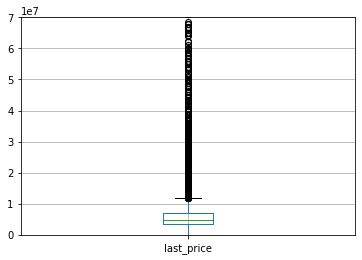

In [200]:
data.boxplot('last_price') #выводим диаграмму "ящик с усами"
plt.ylim(-100000,70000000) #настраиваем диапазон по оси y

Можно увидеть, что большая часть лежит в диапазоне до 7500000, но при этом первый квартиль лежит практически на 0, что подозрительно.  
Рассмотрим значения до того места, где концентрация кружков начинает падать, после начинаются очень большие значения, которые могут исказить исследование. Эти значения редки, так как видно, что медиана стремится к низким значениям.  

Выведем числовое описание данных.

In [201]:
data['last_price'].describe().round() #выведем список характерных значений и округлим

count        23699.0
mean       6541549.0
std       10887013.0
min          12190.0
25%        3400000.0
50%        4650000.0
75%        6800000.0
max      763000000.0
Name: last_price, dtype: float64

Стандартное отклонение сильно отличается от среднего, следовательно, в данных есть большой разброс значений, есть аномалии. Это подтверждает среднее, которое больше медианы, на него влияет несколько очень больших значений.  

Найдем самые низкие цены, отсортируем цены по возрастанию, и выведем на экран первые 5 строк.

In [202]:
data.sort_values(by='last_price', ascending=True).head()
#выводим первые пять строк таблицы, отсортированной по возрастанию цены

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around3000,ponds_around3000,days_exposition,last_price_group,square_metre_price,weekday_exposition,month_exposition,year_exposition,floor_group,city_сenters_nearest_group,living_area_percent,kitchen_area_percent
8793,7,12190.0,109.0,2019-03-20,2,2.75,25,32.00,25,True,False,False,40.5,0,Санкт-Петербург,36421.0,9176.0,1,0,8,низкая,111.83,2,3,2019,последний,в центре,29.36,37.16
17456,7,430000.0,30.4,2019-04-22,1,2.55,2,16.00,1,True,False,False,6.0,0,Сланцы,NaN,NaN,0,0,NaN,низкая,14144.74,0,4,2019,первый,NaN,52.63,19.74
14911,5,430000.0,54.0,2018-06-26,2,2.55,3,18.44,3,True,False,False,7.1,0,поселок станции Свирь,NaN,NaN,0,0,44,низкая,7962.96,1,6,2018,последний,NaN,34.15,13.15
16274,18,440000.0,40.0,2018-07-10,1,2.55,5,18.44,1,True,False,False,7.1,0,деревня Старополье,NaN,NaN,0,0,45,низкая,11000.00,1,7,2018,первый,NaN,46.10,17.75
17676,0,450000.0,36.5,2018-02-01,1,2.55,5,17.30,4,True,False,False,8.5,1,деревня Ям-Тесово,NaN,NaN,0,0,120,низкая,12328.77,3,2,2018,другой,NaN,47.40,23.29


Все значения выглядят правдоподобно кроме первого, не будем использовать его в исследовании. 

Для исследования возьмем срез от 430000 до 35000000.

#### Изучим значения в столбце square_metre_price

Выведем числовое описание данных и построим диаграмму размаха "ящик с усами".

In [203]:
data['square_metre_price'].describe().round() #выведем список характерных значений и округляем

count      23699.0
mean       99422.0
std        50307.0
min          112.0
25%        76585.0
50%        95000.0
75%       114256.0
max      1907500.0
Name: square_metre_price, dtype: float64

Среднее значение близко к медианному, стоимость за квадратный метр правдоподобная, с данными все в порядке.  
Минимальное значение очень мало, это строка с минимальной стоимостью квартиры, удалим ее, чтобы она не мешала исследовать данные в дальнейшем.

In [204]:
data.drop(labels=[8793], axis=0, inplace=True) #удаление строки с индексом 8793

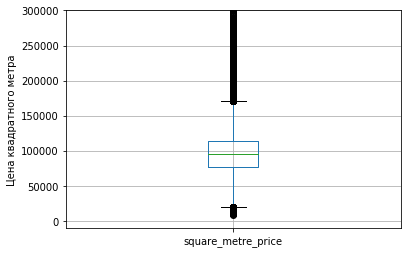

In [205]:
data.boxplot('square_metre_price') #выводим диаграмму "ящик с усами"
plt.ylim(-10000,300000) #настраиваем диапазон по оси Y
plt.ylabel('Цена квадратного метра'); #добавим название оси

Основные значения в промежутке между 20000 и 170000 за квадратный метр. Для исследования возьмем срез от 40000 до 200000 за квадратный метр, так как 20000 за кв. метр это неправдоподобно низкая цена.

#### Изучим значения в столбцах total_area, living_area, kitchen_area

Построим гистограммы для трех столбцов.

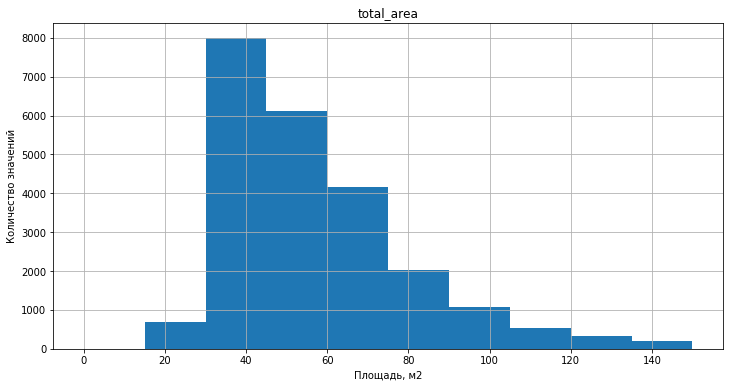

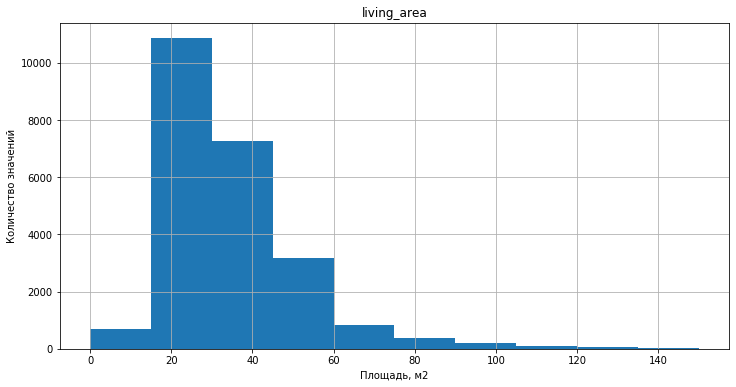

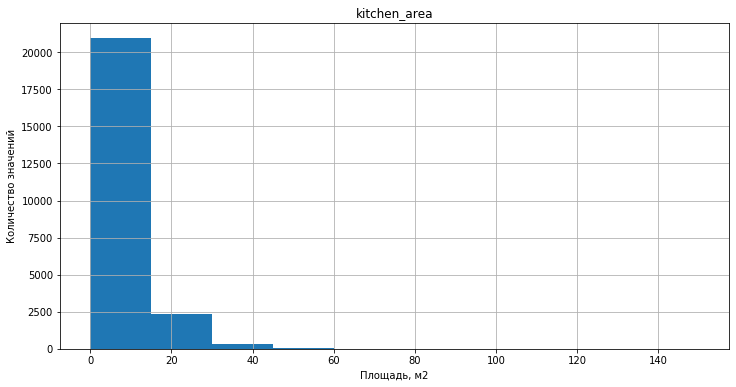

In [206]:
for column in ['total_area', 'living_area', 'kitchen_area']: 
    data.hist(column, range=(0, 150), figsize=(12,6))
    plt.xlabel('Площадь, м2')
    plt.ylabel('Количество значений')
    plt.show()    
#создадим цикл, в котором построим гистограмму для каждого из указанных столбцов,
#зададим диапазон значений и размер гистограммы   
#добавим названия к осям

Гистограммы  total_area, living_area очень похожи, так как увеличение общей площади предполагает увеличение жилой.

Больше всего квартир с общей площадью в диапазоне от 30 до 75 кв. метров, что похоже на правдоподобные данные.

На гистограмме столбцов living_area и kitchen_area видны значения, которые близки к 0, похоже, что в столбцах встречаются аномалии.  

  Выведем числовое описание данных.

In [207]:
data['total_area'].describe() #выведем список характерных значений

count    23698.000000
mean        60.346598
std         35.653434
min         12.000000
25%         40.000000
50%         52.000000
75%         69.875000
max        900.000000
Name: total_area, dtype: float64

In [208]:
data['living_area'].describe() #выведем список характерных значений

count    23698.000000
mean        34.178084
std         21.462061
min          2.000000
25%         18.600000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

In [209]:
data['kitchen_area'].describe() #выведем список характерных значений

count    23698.000000
mean        10.440161
std          5.675524
min          1.300000
25%          7.100000
50%          9.000000
75%         11.927500
max        112.000000
Name: kitchen_area, dtype: float64

Медианы везде близки к среднему. Минимальные значения в столбцах living_area и kitchen_area неправдоподобно малы, что подтверждает наличие аномалий.  

Для total_area возьмем срез данных от 30 до 150 кв.м

#### Изучим значения в столбцах ceiling_height, rooms

Построим гистограммы и выведем числовые данные для этих столбцов.

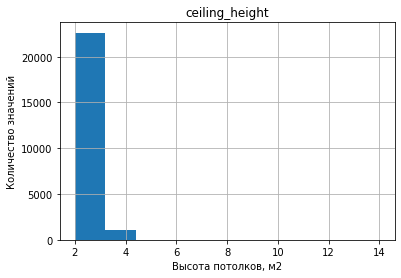

In [210]:
data.hist('ceiling_height') #построим гистограмму, добавим названия осей
plt.xlabel('Высота потолков, м2')
plt.ylabel('Количество значений');

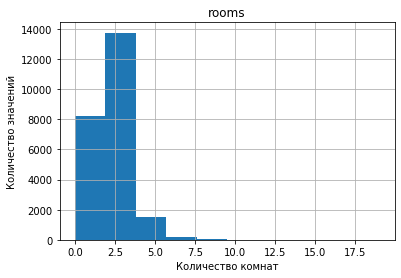

In [211]:
data.hist('rooms') #построим гистограмму, добавим названия осей
plt.xlabel('Количество комнат')
plt.ylabel('Количество значений');

In [212]:
data['ceiling_height'].describe() #выведем список характерных значений

count    23698.000000
mean         2.705650
std          0.270425
min          2.000000
25%          2.550000
50%          2.600000
75%          2.750000
max         14.000000
Name: ceiling_height, dtype: float64

In [213]:
data['rooms'].describe() #выведем список характерных значений

count    23698.000000
mean         2.070639
std          1.078428
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Медиана со средним в обоих столбцах практически совпадает, следовательно нет большого разброса значений, либо они минимальны и не влияют на среднее.  

Основные значения в столбце ceiling_height сосредоточены вокруг значений 2-3 м, что говорит о достоверности данных.  

Кол-во комнат тоже распределено ожидаемо: больше всего 2-х и 3-х комнатных квартир, следующие по популярности однокомнатные.

#### Изучим значения в столбце days_exposition

Построим гистограмму для столбца days_exposition.

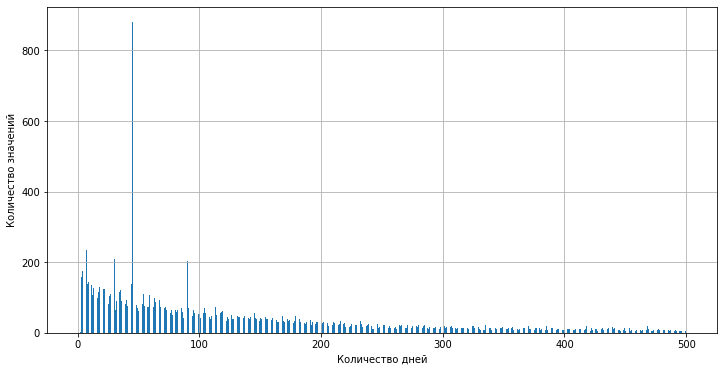

In [214]:
data['days_exposition'].hist(bins=1000, range=(0,500), figsize=(12,6)) 
#строим гистограмму, задаем диапазон значений, кол-во групп и размер графика, добавим названия осей
plt.xlabel('Количество дней')
plt.ylabel('Количество значений');


In [215]:
data['days_exposition'].describe() #выведем список характерных значений

count    20517.000000
mean       180.897061
std        219.730028
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Преобладающее кол-во объявлений были активны в течение от 1 до 150 дней. Среднее в два раза больше медианы, следовательно есть выбросы в виде очень долгого срока размещения, которые влияют на среднее. Длительным сроком размещения можно считать период более 500 дней. На графике на отметке в 40 дней наблюдается пик подаж, поэтому период от 1 до 40 дней можно считать очень быстрым.

### Факторы, влияющие на цену квартиры

Рассмотрим влияние площади, кол-ва комнат, удалённости от центра, от того, на каком этаже расположена квартира: первом, последнем или другом, даты размещения: дня недели, месяца и года на цену квартиры.  

В дальнейшем исследовании будем использовать срез данных по цене квартиры от 430000 до 35000000 руб.

#### Зависимость цены квартиры и квадратного метра

In [218]:
last_price_new = data.query(('last_price >= 430000.0 and last_price <= 35000000.0') and ('square_metre_price >= 40000.0 and square_metre_price <= 200000.0'))
#создаем новую таблицу, в которую помещаем срез данных для last_price и square_metre_price без выбросов

In [219]:
last_price_new['last_price'].corr(last_price_new['square_metre_price'])
#находим корреляцию в таблице last_price_new

0.5349431999327818

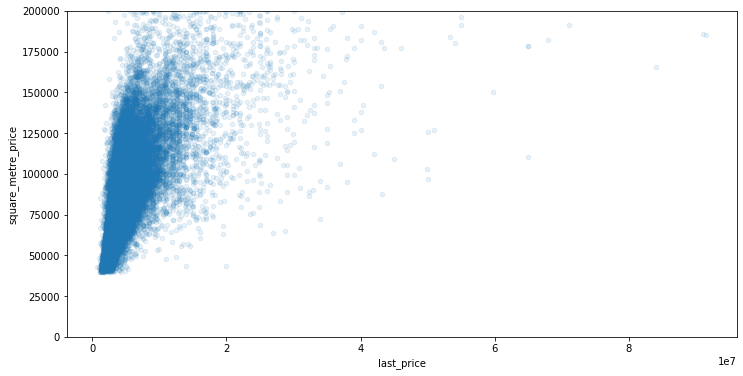

In [220]:
last_price_new.plot(x='last_price', y='square_metre_price', kind='scatter', ylim=(0,200000), figsize=(12,6), alpha=0.1);

#строим график зависимости цены квартиры от стоимости квадратного метра

Корреляция около 0,5. Но если посмотреть на график, то связь между ценой квартиры и стоимостью квадратного метра не прослеживается. На цену влияют и другие факторы.

#### Зависимость цены  от общей площади  

Найдем зависимость с помощью корреляции и графика. Используем срез данных без выбросов.

In [221]:
last_price_new2 = data.query(('last_price >= 430000.0 and last_price <= 35000000.0') and ('total_area >= 30.0 and total_area <= 150.0'))
#создаем новую таблицу, в которую помещаем срез данных для last_price и total_area без выбросов

In [222]:
last_price_new2['last_price'].corr(last_price_new['total_area'])
#находим корреляцию в таблице last_price_new

0.8057767072763504

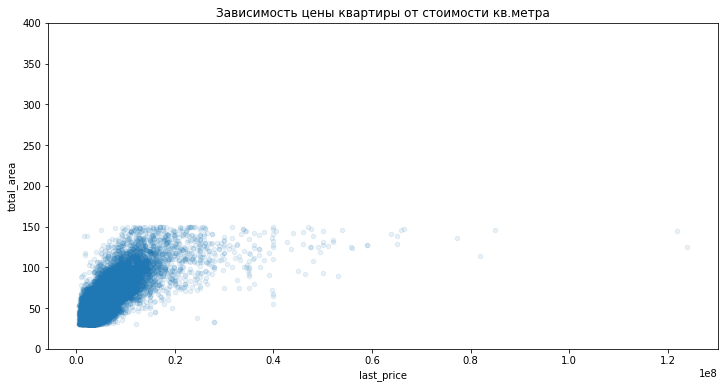

In [223]:
last_price_new2.plot(x='last_price', y='total_area', kind='scatter', ylim=(0,400), figsize=(12,6), alpha=0.1);
plt.title('Зависимость цены квартиры от стоимости кв.метра');
#строим график зависимости
#выбираем визуализацию в виде точек, задаем им прозрачность, диапазон значений по оси Y и размер графика

Коэффициент высокий, график говорит о том, что цена квартиры находится в зависимости от площади. Разброс точек в пределах одной суммы составляет около 50 кв.метров, но при этом до 15000000 скопление точек равномерно поднимается верх, что означает, что с увеличение площади, увеличивается и цена квартиры.

#### Зависимость цены от числа комнат 

Оценим корреляцию и построим график зависимости величин. Используем срез данных без выбрасов.

In [224]:
last_price_new3 = data.query(('last_price >= 430000.0 and last_price <= 35000000.0') and ('rooms < 6'))
#создаем новую таблицу, в которую помещаем срез данных для last_price и rooms без выбросов

In [225]:
last_price_new3['last_price'].corr(last_price_new['rooms']) #находим корреляцию в таблице last_price_new

0.5348326132760131

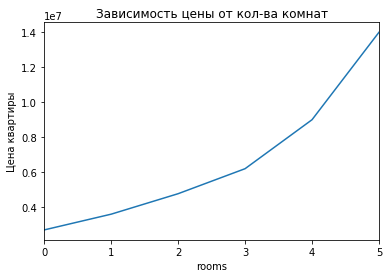

In [226]:
last_price_new3.groupby('rooms')['last_price'].median().plot()
#график зависимости цены квартиры от числа комнат
plt.title('Зависимость цены от кол-ва комнат')
plt.ylabel('Цена квартиры');

График показывает четкую зависимость цены от кол-ва комнат в диапазоне от 0 до 5 комнат, чем больше комнат, тем выше цена.

#### Зависимость цены от удалённости от центра 

Найдем корреляцию между ценой квартиры и всеми значениями в столбце city_сenters_nearest.  
Выведем сводную таблицу с медианной ценой квадратного метра по каждой группе столбца city_сenters_nearest_group.

In [228]:
last_price_new4 = data.query('last_price >= 430000.0 and last_price <= 35000000.0')
#создаем новую таблицу, в которую помещаем срез данных для last_price и rooms без выбросов

In [229]:
last_price_new4['last_price'].corr(last_price_new4['city_сenters_nearest']) #находим корреляцию 

-0.34203183300943685

In [230]:
metre_price_city_group_pivot = last_price_new4.pivot_table(index=['city_сenters_nearest_group'], values='last_price', aggfunc='median')
#создаем сводную таблицу
metre_price_city_group_pivot #выводим ее на экран

,last_price
city_сenters_nearest_group,
в центре,7350000.0
недалеко,5000000.0
далеко,4400000.0


Видим небольшую отрицательную корреляцию, но на сводной таблице эта зависимость просматривается лучше - чем дальше от центра, тем дешевле квартира. Удаленность от центра влияет на цену квартиры.

#### Зависимость цены  от этажа

Используем сводную таблицу с медианной ценой по каждой группе столбца floor_group.

In [231]:
square_metre_price_floor_pivot = last_price_new4.pivot_table(index=['floor_group'], values='last_price', aggfunc='median')
#создаем сводную таблицу
square_metre_price_floor_pivot #выводим ее на экран

,last_price
floor_group,
другой,4800000.0
первый,3900000.0
последний,4285000.0


Сводная таблица говорит о том, что квартиры на первом и последнем этажах немного дешевле, чем на остальных.

#### Зависимость цены  от  даты размещения: дня недели, месяца и года.

Найдем коэффициенты корреляции для дня недели, месяца и года. Используем срез по цене.

In [232]:
last_price_new4['last_price'].corr(last_price_new['weekday_exposition']) #находим корреляцию

-0.01565137830643193

In [233]:
last_price_new4['last_price'].corr(last_price_new['month_exposition']) #находим корреляцию

0.0036873816696977287

In [234]:
last_price_new4['last_price'].corr(last_price_new['year_exposition']) #находим корреляцию

-0.03025579846799231

Линейная корреляция полностью отсутствует.

Построим графики и посмотрим зависимость медианной цены квартиры по сгруппированным дням недели, месецам и годам.

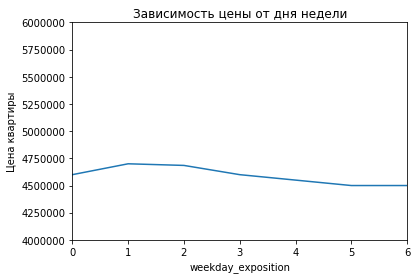

In [235]:
last_price_new4.groupby('weekday_exposition')['last_price'].median().plot(ylim=(4000000,6000000));
plt.title('Зависимость цены от дня недели')
plt.ylabel('Цена квартиры');
#строим график зависимости медианных значений цены по сгруппированным дням недели

Медианные значения по дням недели практически не различаются, связь от дня недели не прослеживается.

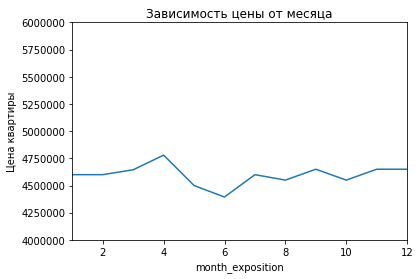

In [236]:
last_price_new4.groupby('month_exposition')['last_price'].median().plot(ylim=(4000000,6000000))
plt.title('Зависимость цены от месяца')
plt.ylabel('Цена квартиры');
#строим график зависимости медианных значений цены по сгруппированным месецам

На графике наблюдается пик значений в апреле, цены квартир немного повышаются по сравнению со всем годом, а потом начинают падать, достигая минимального значения в июне. Возможно это связано не с месяцем, а с кол-вом объявлений в эти месяцы.  

Посмотрим на медианные значения кол-ва объявлений по месяцам.

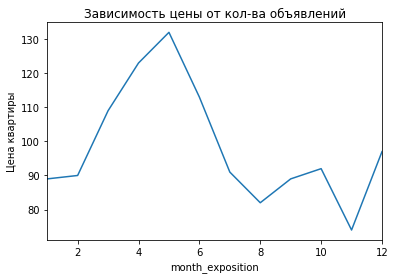

In [237]:
last_price_new4.groupby('month_exposition')['days_exposition'].median().plot()
plt.title('Зависимость цены от кол-ва объявлений')
plt.ylabel('Цена квартиры');
#строим график зависимости медианных значений кол-ва объявлений сгруппированных по месяцам

Видим резкий рост кол-ва объявлений после февраля, пик которого приходится на май. Возможно из-за большой конкуренции, цены на квартиры начали снижаться. К июлю кол-во объявлений упало, и цены снова начали возвращаться к своему первоначальному уровню.

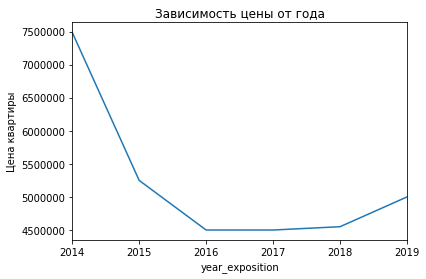

In [238]:
last_price_new4.groupby('year_exposition')['last_price'].median().plot()
plt.title('Зависимость цены от года')
plt.ylabel('Цена квартиры');
#строим график зависимости медианных значений цены по сгруппированным годам

С 2014 по 2016 года стоимость квартир резко упала, квартиры подешевели на 40%. Это может быть связано с различными экономическими факторами, например предложение привысило спрос. 

#### Вывод  
На основе среза данных о цене квартиры, оценили зависимость стоимости квартиры от таких факторов как: цена квадратного метра, площадь, кол-во комнат, этаж и дата размещения объявления.

Между стоимостью квадратного метра и ценой квартиры зависимость не прослеживается.

Площадь влияет на цену квартир - чем больше площадь жилья, тем выше цена.

Удаленность от центра имеет отрицательныц коэффициент корреляции, прослеживается связь -  чем дальше от центра, тем дешевле квартира.  

Число комнат напрямую влияет на цену квартиры: чем больше комнат, тем дороже.

На первом и последнем этажах квартиры немного дешевле, чем на остальных этажах.  

День недели не влияет на стоимость жилья. Цены немного повышаются в апреле и снижаются в июне, мы выяснили, что это может быть связано с кол-вом объявлений: в июне предложение о покупке квартир сильно повышается и цены начинают снижаться. С 2014 по 2016 года наблюдается резкое снижение цен, что может быть связано с увеличением предложения на рынке недвижимости, после 2018 года наблюдается небольшой рост.

### Изучение стоимости квадратного метра в населенных пунктах

#### Топ-10 населенных пунктов

Найдем населенные пункты, в которых продается наибольшее кол-во квартир.

In [239]:
top_localyti = data['locality_name'].value_counts().head(10)
#создадим переменную, в которой сохраним названия населенных пунктов
top_localyti #выведем ее на экран

Санкт-Петербург      15720
поселок Мурино         556
поселок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
поселок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

Создадим новую таблицу, в которую будут входить только те строки, которые принадлежат населенным пунктам из списка топ-10.

In [240]:
data_top = data[data['locality_name'].isin(top_localyti.index)] #сохраним в переменную все строки из списка топ-10

Посчитаем медианную цену квадратного метра для каждого населенного пункта из топ-10.

In [241]:
data_top.groupby('locality_name')['square_metre_price'].median()
#группируем по названию населенного пункта и находим медианное значение для каждой группы

locality_name
Всеволожск            65789.470
Выборг                58158.320
Гатчина               67796.610
Колпино               74723.745
Пушкин               100000.000
Санкт-Петербург      104766.085
деревня Кудрово       91860.470
поселок Мурино        85878.465
поселок Парголово     91642.860
поселок Шушары        76876.175
Name: square_metre_price, dtype: float64

Самый дорогой квадратный метр в городах Санкт-Петербург и Пушкин, следом идет поселок Парголово и деревня Кудрово.

Найдем населённые пункты с самой высокой и низкой стоимостью жилья.

In [242]:
data[data['last_price'] == data['last_price'].max()] #выводим строку с самой дорогой квартирой

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around3000,ponds_around3000,days_exposition,last_price_group,square_metre_price,weekday_exposition,month_exposition,year_exposition,floor_group,city_сenters_nearest_group,living_area_percent,kitchen_area_percent
12971,19,763000000.0,400.0,2017-09-30,7,3.0,10,250.0,10,True,False,False,14.0,2,Санкт-Петербург,25108.0,3956.0,1,3,33,высокая,1907500.0,5,9,2017,последний,в центре,62.5,3.5


In [243]:
data[data['last_price'] == data['last_price'].min()] #выводим строку с самой дешевой квартирой

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around3000,ponds_around3000,days_exposition,last_price_group,square_metre_price,weekday_exposition,month_exposition,year_exposition,floor_group,city_сenters_nearest_group,living_area_percent,kitchen_area_percent
14911,5,430000.0,54.0,2018-06-26,2,2.55,3,18.44,3,True,False,False,7.1,0,поселок станции Свирь,NaN,NaN,0,0,44,низкая,7962.96,1,6,2018,последний,NaN,34.15,13.15
17456,7,430000.0,30.4,2019-04-22,1,2.55,2,16.00,1,True,False,False,6.0,0,Сланцы,NaN,NaN,0,0,NaN,низкая,14144.74,0,4,2019,первый,NaN,52.63,19.74


Самая дорогая квартира за 763000000 находится в центре Санкт-Петербурга, самых дешевых две за 430000 - в поселке станции Свирь и Сланцах.

#### Изучение предложения квартир в зависимости от удаленности от центра Санкт-Петербурга

Нужно выяснить, какая область входит в центр. Для этого выясним, как цена зависит от удалённости от центра. Построим график, где график будет сильно меняется, — это и будет центральная зона.  

Выведем все квартиры в Санкт-Петербурге.

In [244]:
data_spb = data.query('locality_name == "Санкт-Петербург"') #создадим новую таблицу с квартирами в Санкт-Петербурге

Добавим новый столбец в таблицу по Санкт-Петербургу, в котором переведем расстояние в километры.

In [245]:
data_spb['city_centers_nearest_km'] = (data_spb['city_сenters_nearest'] / 1000).round()
#создаем новый столбец, в котором делим значения в метрах на 1000, округлим значения
data_spb.head() #выведем первые 5 строк, чтобы убедиться, что столбец добавился

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around3000,ponds_around3000,days_exposition,last_price_group,square_metre_price,weekday_exposition,month_exposition,year_exposition,floor_group,city_сenters_nearest_group,living_area_percent,kitchen_area_percent,city_centers_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,2,NaN,высокая,120370.37,3,3,2019,другой,далеко,47.22,23.15,16.0
2,10,5196000.0,56.0,2015-08-20,2,2.60,5,34.3,4,True,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,2,558,средняя,92785.71,3,8,2015,другой,недалеко,61.25,14.82,14.0
3,0,64900000.0,159.0,2015-07-24,3,3.00,14,52.0,9,True,False,False,14.0,0,Санкт-Петербург,28098.0,6800.0,2,3,424,высокая,408176.10,4,7,2015,другой,в центре,32.70,8.81,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,1,121,высокая,100000.00,1,6,2018,другой,в центре,32.00,41.00,8.0
7,5,7915000.0,71.6,2019-04-18,2,3.00,24,52.0,22,True,False,False,18.9,2,Санкт-Петербург,23982.0,11634.0,0,0,NaN,высокая,110544.69,3,4,2019,другой,недалеко,72.63,26.40,12.0


Сгруппируем столбец со значениями в километрах и выведем медианную цену квартиры для каждой группы, построим график зависимости цены от удаленности от центра.

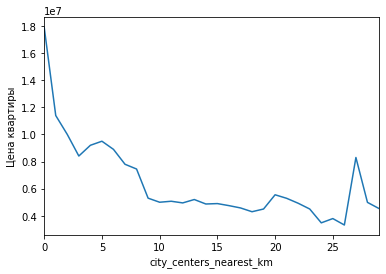

In [246]:
data_spb.groupby('city_centers_nearest_km')['last_price'].median().plot(x='last_price', y='city_centers_nearest_km')
#группируем, присваиваем медианную цену квартиры и строим график
plt.ylabel('Цена квартиры'); #добавим название оси

Скачек наблидается в районе 3 км, эту границу и будем считать центром города.

#### Вывод  
Нашли 10 населенных пунктов с самым большим кол-вом объявлений, опредилили для них медианную стоимость квадратного метра. Самым популярным ожидаемо оказался Санкт-Петербург, в котором самая высокая цена квадратного метра.  

Определили, что область на расстоянии 3 км можно назвать центром.

### Анализ квартир в центре

Выделим сегмент квартир в центре.

In [247]:
data_spb_centr = data_spb.query('city_centers_nearest_km <= 3')
#создадим таблицу, в которой сохраним строки с удаленностью от центра не более 3 км

#### Изучим параметры квартир в центре  

Посмотрим на значения столбцов last_price, square_metre_price, total_area, ceiling_height и rooms: построим графики и выведем числовые данные.  


- **Изучим last_price**: построим диаграмму "ящик с усами" и выведем основные числовые характеристики

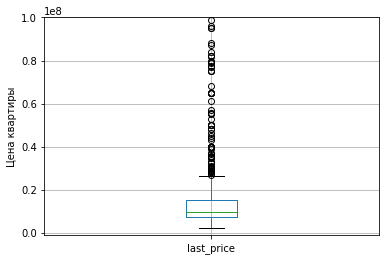

In [248]:
data_spb_centr.boxplot('last_price') #выводим диаграмму "ящик с усами"
plt.ylim(-1000000,100000000) #настраиваем диапазон по оси y
plt.ylabel('Цена квартиры'); #добавим название оси

In [249]:
data_spb_centr['last_price'].describe().round() #выведем список характерных значений и округляем

count          879.0
mean      16302047.0
std       26456537.0
min        2100000.0
25%        7300000.0
50%        9800000.0
75%       14995000.0
max      401300000.0
Name: last_price, dtype: float64

Посмотрим на самые дешевые квартиры.

In [250]:
data_spb_centr.sort_values(by='last_price', ascending=True).head(10)
#выводим первые пять строк таблицы, отсортированной по возрастанию цены

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around3000,ponds_around3000,days_exposition,last_price_group,square_metre_price,weekday_exposition,month_exposition,year_exposition,floor_group,city_сenters_nearest_group,living_area_percent,kitchen_area_percent,city_centers_nearest_km
9412,5,2100000.0,16.0,2017-12-10,0,2.55,6,13.00,1,True,False,True,7.1,0,Санкт-Петербург,20735.0,2111.0,2,3,3,низкая,131250.00,6,12,2017,первый,в центре,81.25,44.38,2.0
17860,1,2385000.0,20.0,2018-12-11,1,2.55,6,18.44,2,True,False,False,7.1,0,Санкт-Петербург,23361.0,2903.0,0,1,25,низкая,119250.00,1,12,2018,другой,в центре,92.20,35.50,3.0
19904,4,2400000.0,12.0,2017-07-19,1,2.55,5,10.00,2,True,False,False,7.1,0,Санкт-Петербург,21314.0,964.0,1,2,200,низкая,200000.00,2,7,2017,другой,в центре,83.33,59.17,1.0
5239,1,2645000.0,24.4,2018-12-10,1,3.33,6,18.44,2,True,False,False,7.1,0,Санкт-Петербург,23273.0,2814.0,0,2,26,низкая,108401.64,0,12,2018,другой,в центре,75.57,29.10,3.0
5182,11,2750000.0,38.1,2016-05-21,1,2.82,5,14.10,1,False,False,False,6.3,0,Санкт-Петербург,19925.0,2357.0,3,3,121,низкая,72178.48,5,5,2016,первый,в центре,37.01,16.54,2.0
10287,5,2800000.0,31.0,2018-01-15,1,2.60,5,16.00,1,True,False,False,8.0,0,Санкт-Петербург,20873.0,3238.0,2,1,62,низкая,90322.58,0,1,2018,первый,в центре,51.61,25.81,3.0
3719,8,3100000.0,48.8,2017-05-12,1,2.55,6,28.90,1,True,False,False,12.1,0,Санкт-Петербург,22774.0,3082.0,1,3,80,низкая,63524.59,4,5,2017,первый,в центре,59.22,24.80,3.0
21478,3,3100000.0,22.7,2018-08-22,0,3.33,5,17.00,2,True,True,False,7.1,0,Санкт-Петербург,20081.0,3363.0,1,1,27,низкая,136563.88,2,8,2018,другой,в центре,74.89,31.28,3.0
20254,5,3200000.0,23.6,2018-07-13,0,3.10,4,17.00,1,True,True,False,8.0,0,Санкт-Петербург,22807.0,2349.0,0,0,67,ниже среднего,135593.22,4,7,2018,первый,в центре,72.03,33.90,2.0
18659,10,3290000.0,28.6,2018-03-22,1,2.57,6,15.30,4,True,False,False,6.2,1,Санкт-Петербург,20865.0,2135.0,2,3,28,ниже среднего,115034.97,3,3,2018,другой,в центре,53.50,21.68,2.0


В таблице наблюдаются неоправданно дешевые квартиры с очень большими площадями, помимо этого стоимость квартиры меньше 3000000 в центре Санкт-Петербурга можно считать неправдоподобной, все эти значения будем считать выбросами. На графике заметен разрыв между значениями в районе 60000000.

Средняя цена выше медианной, это говорит об очень дорогих квартирах, но их не много так как медиана стремится к низким значениям. Основные значения находятся в диапазоне от 1600000 до 25000000.

Для исследования будем использовать срез от 3000000 до 60000000.

- **Изучим square_metre_price:** построим диаграмму "ящик с усами" и выведем основные числовые характеристики

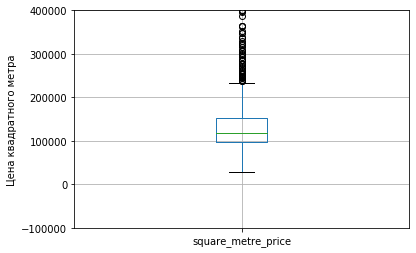

In [251]:
data_spb_centr.boxplot('square_metre_price') #выводим диаграмму "ящик с усами"
plt.ylim(-100000,400000) #настраиваем диапазон по оси y
plt.ylabel('Цена квадратного метра'); #добавим название оси

In [252]:
data_spb_centr['square_metre_price'].describe().round()
#выведем список характерных значений и округлим

count        879.0
mean      150218.0
std       125122.0
min        28920.0
25%        96501.0
50%       117391.0
75%       151782.0
max      1736842.0
Name: square_metre_price, dtype: float64

Средняя цена ниже медианной, следовательно есть несколько очень низких значений стоимости квадратного метра. Основные значения сосредоточены в диапазоне от 100000 до 300000 за кв. метр.

- **Изучим total_area:** построим гистограмму и выведем числовые данные по столбцу

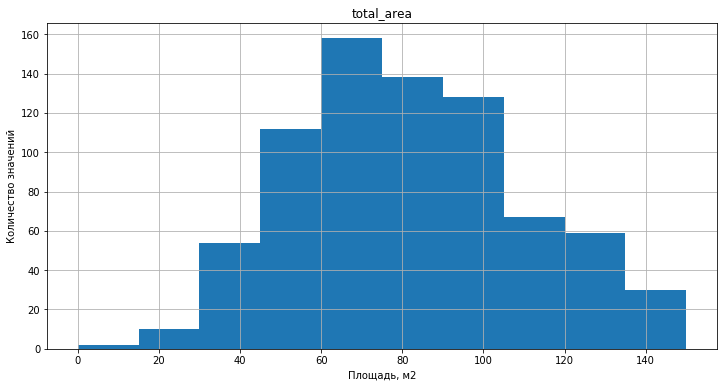

In [253]:
data_spb_centr.hist('total_area', range=(0, 150), figsize=(12,6))
#строим гистограмму, задаем диапазон значений и размер гистограммы
plt.xlabel('Площадь, м2')
plt.ylabel('Количество значений');#добавим название по осям

In [254]:
data_spb_centr['total_area'].describe() #выведем список характерных значений 

count    879.000000
mean      98.632446
std       56.543138
min       12.000000
25%       63.300000
50%       85.000000
75%      116.500000
max      517.000000
Name: total_area, dtype: float64

Среднее больше медианы, есть достаточно много квартир с большой площадью. Основное кол-во значений находится между 60 и 100 кв.м.  

- **Изучим ceiling_height:** построим гистограмму.

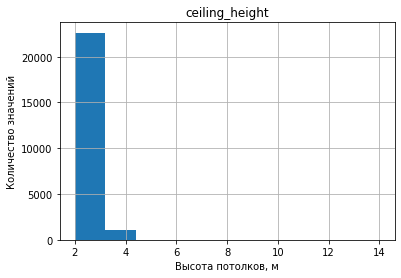

In [255]:
data.hist('ceiling_height') #строим гистограмму
plt.xlabel('Высота потолков, м')
plt.ylabel('Количество значений');#добавим название по осям

Большинство квартир с высотой потолков от 2 до 3 метров. Разброс значений небольшой.

- **Изучим rooms:** построим гистограмму и выведем числовые данные по столбцу

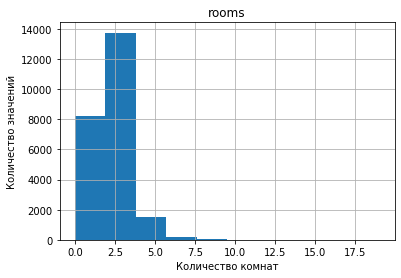

In [256]:
data.hist('rooms') #строим гистограмму
plt.xlabel('Количество комнат')
plt.ylabel('Количество значений');#добавим название по осям

In [257]:
data_spb_centr['rooms'].describe() #выведем список характерных значений 

count    879.000000
mean       3.110353
std        1.486575
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       14.000000
Name: rooms, dtype: float64

Преобладают 2-х и 3-х комнатные квартиры, следующие по популярности однокомнатные и студии. 

#### Факторы, которые влияют на цену квартиры в центре  

Изучим как число комнат, этаж, удалённость от центра, дата размещения объявления влияют на цену квартиры в центре.  

In [258]:
last_price_new_spb = data_spb_centr.query(('last_price >= 3000000.0 and last_price <= 60000000.0') and ('total_area >= 30.0 and total_area <= 150.0'))
#срез данных для last_price в таблице по ценам и площади в центре Санкт-Петербурга

 **Зависимость от общей площади:** оценим корреляцию и построим график

In [259]:
last_price_new_spb['last_price'].corr(last_price_new_spb['total_area']) #находим корреляцию

0.4373053939602834

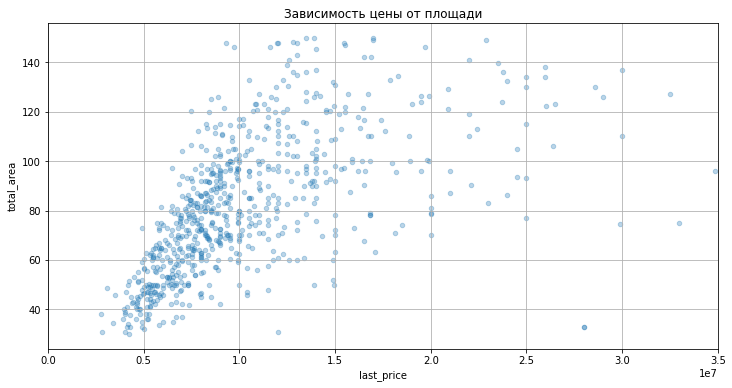

In [260]:
last_price_new_spb.plot(x='last_price', y='total_area', kind='scatter',  xlim=(0,35000000), figsize=(12,6), alpha=0.3, grid=True)
plt.title('Зависимость цены от площади');
#строим график зависимости
#выбираем визуализацию в виде точек, задаем им прозрачность, диапазон значений по оси Y и размер графика

Коэффициент корреляции низкий. После 10 млн. график показывает довольно большой разброс значений площади. На цену квартир до 10 млн. размер площади влияет в большей степени, чем на более дорогие квартиры.

- **Зависимость цены от кол-ва комнат:** оценим корреляцию и построим график. Используем срез данных.

In [261]:
last_price_new_spb2 = data_spb_centr.query(('last_price >= 3000000.0 and last_price <= 60000000.0') and ('rooms < 6'))
#срез данных для last_price в таблице по ценам и комнатам в центре Санкт-Петербурга

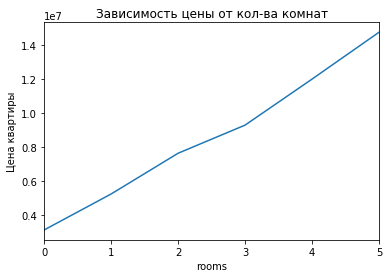

In [262]:
last_price_new_spb2.groupby('rooms')['last_price'].median().plot() #график зависимости цены от числа комнат
plt.title('Зависимость цены от кол-ва комнат')
plt.ylabel('Цена квартиры');

График показывает зависимость цены от кол-ва комнат: чем больше комнат, тем выше цена.

- **Зависимость цены от этажа:** выведем сводную таблицу медианных значений цены квартиры по каждой группе этажей.

In [263]:
last_price_new_spb3 = data_spb_centr.query('last_price >= 3000000.0 and last_price <= 60000000.0')
#срез данных для last_price в таблице по ценам в центре Санкт-Петербурга

In [264]:
square_metre_price_floor_pivot2 = last_price_new_spb3.pivot_table(index=['floor_group'], values='last_price', aggfunc='median')
#создаем сводную таблицу, группируем по этажам и присваиваем медианные значения цен 
square_metre_price_floor_pivot2 #выводим ее на экран

,last_price
floor_group,
другой,10350000.0
первый,7250000.0
последний,9200000.0


По сводной таблице можно заметить, что цена на первом и последнем этажах цена ниже, чем на остальных.

- **Зависимость цены от удаленности от центра:** найдем коэффициент корреляции и построим график

In [265]:
last_price_new_spb3['last_price'].corr(last_price_new_spb3['city_сenters_nearest']) #находим корреляцию

-0.19531617937896434

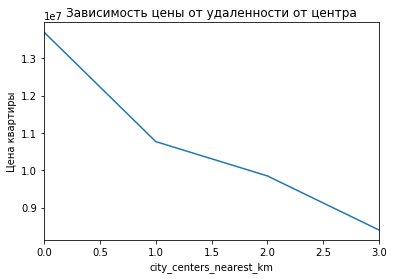

In [266]:
last_price_new_spb3.groupby('city_centers_nearest_km')['last_price'].median().plot() #график зависимости цены от растояния от центра
plt.title('Зависимость цены от удаленности от центра')
plt.ylabel('Цена квартиры');

Видим небольшую отрицательную корреляцию, но на графике видна четкая зависимость от удаленности - чем дальше от центра, тем дешевле квартира. Удаленность от центра влияет на цену квартиры.

- **Зависимость цены от даты размещения объявления**: построим графики и посмотрим зависимость медианной цены квартиры по сгруппированным дням недели, месецам и годам.

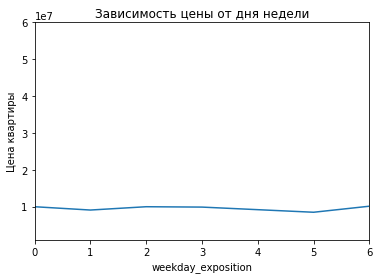

In [267]:
last_price_new_spb3.groupby('weekday_exposition')['last_price'].median().plot(ylim=(1000000,60000000))
plt.title('Зависимость цены от дня недели')
plt.ylabel('Цена квартиры');
#строим график зависимости медианных значений цены по сгруппированным дням недели

Медианные значения по дням недели практически не различаются, связь от дня недели не прослеживается.

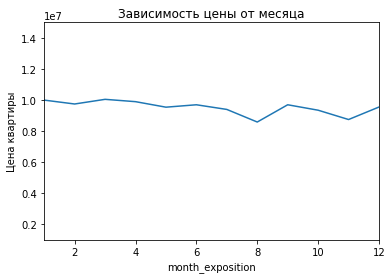

In [268]:
last_price_new_spb3.groupby('month_exposition')['last_price'].median().plot(ylim=(1000000,15000000))
plt.title('Зависимость цены от месяца')
plt.ylabel('Цена квартиры');
#строим график зависимости медианных значений цены по сгруппированным месецам

Явная зависимость от месяца не прослеживается. Есть небольшие колебания в районе августа, возможно они связаны с тем, что квартиры пытаются успеть продать до конца лета.

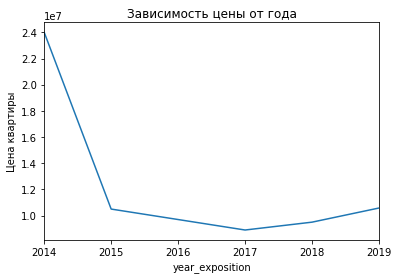

In [269]:
last_price_new_spb3.groupby('year_exposition')['last_price'].median().plot()
plt.title('Зависимость цены от года')
plt.ylabel('Цена квартиры');
#строим график зависимости медианных значений цены по сгруппированным годам

C 2014 по 2015 года наблюдается стремительное падение цен, до 2017 незначительное падение продолжается, далее цена начинает медленно расти. С 2014 по 2016 года квартиры подешевели на 60%.

### Вывод  
Исходя из полученных данных, для центра Санкт-Петербурка прослеживается небольшое влияние площади на цену квартир до 10 млн.  
С увеличением кол-ва комнат увеличивается цена квартиры.  
Чем дальше от центра, тем дешевле квартира.  
На первом и последнем этажах квартиры дешевле, чем на остальных.  
День недели и месяц не оказывают влияния на цену.  
С 2014 по 2015 года квартиры подешевели на 60%.

И в центре и во всем городе в целом влияние таких факторов как площадь, кол-во комнат, этаж и удаленность от центра идентично.  

Можно отметить, что цены с 2014 по 2016 по городу не так сильно упали как в центре.


## Итоги исследования <a id='5'></a>

Прежде чем научиться определять рыночную стоимость объектов недвижимости и установливать параметры, которые влияют на цену, мы провели предобработку исходных данных: заменили пропуски на подходящие значения, изменили тип данных, исправили некорректные значения, добавили столбцы с недостающей информацией.  

Сравнили основные характеристики жилья по городу в целом и в центре:  

|Характеристики|Город|Центр|
|:-----|:---:|:---:|
|Площадь|52 кв.м|85 кв.м|
|Цена квартиры|4.6 млн.|10 млн.|
|Цена кв. метра|95 000|120 000|

Анализируя данные, установили что:  
- на рынке недвижимости существует очень большой разброс по стоимости жилья;   
- время продажи от 1 до 45 дней можно считать очень быстрым, а более 500 дней - долгим;    
- в Санкт-Петербурге самая высокая цена квадратного метра и самая дорогая квартира;  
- кол-во квартир в центре города с большой площадью, больше, чем по городу в целом;  
- площадь влияет на цену квартир с меньшей стоимостью, на дорогие квартиры не оказывает влияния;   
- чем больше комнат, тем дороже квартира;  
- чем дальше от центра, тем дешевле жилье;  
- цена квартир на первом и последнем этажах несколько ниже, чем на остальных;  
- в летние месяцы цена квартиры может незначительно вырасти;  
- день недели совсем не влияет на цену;  
- год продажи модет значительно влиять на цену квартиры.  